# COMP60711 - Part 2 Coursework 1

|                           |                                                                                                                                                                               |
|--------------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|              Course Unit: | COMP60711: Data Engineering                                                                                                                                                   |
| Responsible Staff Member: | Professor John Keane                                                                                                                                                          |
|                    Marks: | This course is worth **25%** of the overall marks for this unit.                                                                                                                |
|              Submissions: | This is the **3rd** of **4** assessed submissions.                                                                                                                                    |
|     Method of Submitting: | This notebook, after completion, should be saved as a HTML document and submitted using Blackboard                                                                                      |
|                 Deadline: | Thursday 24th October 10AM (UK time)                                                                                                                                                                            |
|         Late Submissions: | Extensions will only be granted as a result of formally processed [Mitigating Circumstances](http://documents.manchester.ac.uk/DocuInfo.aspx?DocID=427). Marks for late submissions will be reduced in line with the [University policy](http://documents.manchester.ac.uk/display.aspx?DocID=24561). |

Please complete the questions in the spaces provided (under the "Answer" block for each question), then download the notebook in HTML format and submit to Blackboard.

Please also add your student ID and name below.

| Student ID (7-8 digit number) | Full Name |
|:-------------------------------:|:-----------:|
|       10458052                 |  Radoslaw Kamil Izak         |

## Reminders
* **Please make clear any assumptions and provide evidence to justify your answers** 
* Jupyter notebooks use markdown. A brief summary of how to use markdown can be seen [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet). Otherwise, please refer to the brief guide on Blackboard.
* You **must** cite any sources used, from web pages to academic papers and textbooks.
* Please ensure your code has no errors, and that the output is shown in your submitted version.
* We have added some general notebooks on Blackboard to cover the basics of plotting in Python, Jupyter notebooks, and anaconda.
* Some questions require a mixture of code and text to answer the question. Marks are awarded based on the output of your code (i.e. graphs) and the explanation provided, not on the code itself.

# Question 1: Clustering (16 marks)

The following sub-questions are about [clustering](https://www-users.cs.umn.edu/~kumar001/dmbook/ch8.pdf). In general, the topics covered are as follows:
* Question 1.1 focuses on clustering algorithmic behaviour, and their sensitivity to data.
* Question 1.2 focuses on method for estimating the number of clusters.
* Question 1.3 uses a large real-world dataset to look at how clustering can be used for knowledge discovery.

The following reading is likely to be of use for the following questions:
1. Book chapter on clustering: https://www-users.cs.umn.edu/~kumar001/dmbook/ch8.pdf
    * Note that certain sections may be useful, you are not expected to read it all!
2. Here is an example of running KMeans using scikit-learn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html

For this question, we will use multiple datasets, which can all be found on Blackboard. To load these datasets in, we can use the following code. Note that you may need to adjust the path to the dataset, depending on where they are located on your system.

In [59]:
import pandas as pd

def load_dataset(file_name, **kwargs):
    try:
        data = pd.read_csv(file_name, **kwargs)
    except FileNotFoundError:
        raise FileNotFoundError(f"Cannot find {file_name}, please either place the file in the same directory as this notebook, or provide the full path")
    labels = data.values[:, -1]
    data = data.values[:, :-1]
    return data, labels

# This loads the dataset used in Q1.1a
simple_data, simple_labels = load_dataset("simple.csv")

## Q1.1 (6 marks)

### Q1.1a (2 marks)
Using `simple.csv`, run the K-Means and single-linkage algorithms (available in [`scikit-learn`](https://scikit-learn.org/stable/modules/clustering.html)) on the dataset, using the true number of clusters ($K=5$). Produce a graph (e.g. bar chart) showing the performance (measured using the [adjusted rand index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)) across 10 independent runs. Discuss the results obtained, using your knowledge of how the algorithms work to explain why the behaviour observed occurred.

**Hints:**
* This question is more difficult without the use of error bars!
* For single-linkage, use `AgglomerativeClustering(n_clusters=5, linkage="single")`
* For KMeans, use `KMeans(n_clusters=5, init="random", n_init=1)` as arguments.

### Q1.1a Answer

In [60]:
# Please enter any relevant code for Q1.1a below.
# You can use multiple cells if it helps break up the code execution

# Import libraries to be used later on
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import numpy as np

In [61]:
# Setting up functions first to use for questions Q1.1a -> Q1.1c
def q1a_c_datavis(data: np.ndarray, labels: np.ndarray, title: str) -> None:
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", label=labels)
    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

def q1a_c_barplot(data: np.ndarray, labels: np.ndarray) -> None:
    # We intialize variables to hold performance for the 10 runs
    adj_ran_scr_kmeans = []
    ajd_ran_scr_slinkage = []

    # Run the algorithms 10 times
    for _ in range(10):
        # K-Means section
        kmeans = KMeans(n_clusters=5, init="random", n_init=1)
        kmeans_labels = kmeans.fit_predict(data)
        adj_ran_scr_kmeans.append(adjusted_rand_score(labels, kmeans_labels))

        # Single-Linkage section
        single_linkage = AgglomerativeClustering(n_clusters=5, linkage="single")
        single_linkage_labels = single_linkage.fit_predict(data)
        ajd_ran_scr_slinkage.append(adjusted_rand_score(labels, single_linkage_labels))

    # Cast to Numpy array for easier plotting, manipulation, etc.
    adj_ran_scr_kmeans = np.array(adj_ran_scr_kmeans)
    ajd_ran_scr_slinkage = np.array(ajd_ran_scr_slinkage)

    # Now we plot a grouped bar chart to better visualise performance
    # Number of runs, used for plotting positioning
    x_vals = np.arange(10)
    # Width of the resultant bars, used for better visualisation
    bar_width = 0.35
    plt.style.use("seaborn-v0_8-whitegrid")
    fig, ax = plt.subplots()
    _ = ax.bar(x_vals - bar_width/2, adj_ran_scr_kmeans, bar_width, label="K-Means", yerr=np.std(adj_ran_scr_kmeans))
    _ = ax.bar(x_vals + bar_width/2, ajd_ran_scr_slinkage, bar_width, label="Single-Linkage", yerr=np.std(ajd_ran_scr_slinkage))

    # Add labels, title and x-axis ticks, legend,  etc.
    ax.set_xlabel("Run No.")
    ax.set_ylabel("Adjusted Rand Score")
    ax.set_title("Adjusted Rand Score by chosen algorithm and Indepdendent Run No.")
    ax.set_xticks(x_vals)
    ax.legend()
    fig.tight_layout()
    plt.show()

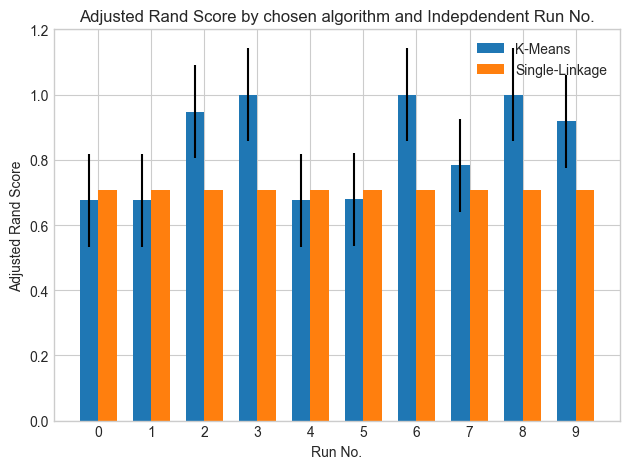

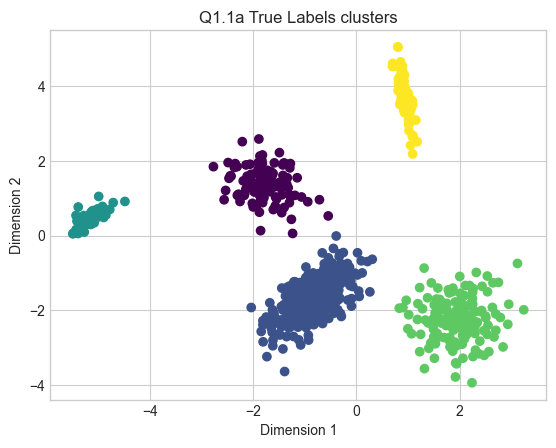

In [62]:
# Getting the required plots
# The black lines are the standard deviation.
q1a_c_barplot(simple_data, simple_labels)
q1a_c_datavis(simple_data, simple_labels, "Q1.1a True Labels clusters")

### Q1.1a Discussion
#### Question at hand: Discuss the results obtained, using your knowledge of how the algorithms work to explain why the behaviour observed occurred.

#### As information/insights placed in this section will be used later on, it will be more detailed than the question requires to guide further discussion. 

#### K-Means algorithm [[1]](#1)
##### Behaviour:
1. Initialization: The algorithm focuses on splitting data into `K` non-overlapping subsets/clusters based on variance, minimizing the clusters `inertia`. We first choose the number of clusters to be found (in our example `K=5`). Then, randomly selected `K` points act as initial centroids of the clusters. 
2. Distance calculation/Assignment: For each of these datapoint, the distance to the `K` clusters is calculted. This is usually done via `Euclidean Distance`, but `PCA` or other methods might be required beforehand for higher-dimensionality spaces (this is so-called `curse of dimensionality`); thankfully, this was not required for our task. 
3. Update clusters: Then, based on the distance, all datapoints are assigned to the nearest centroid. After this is done, a `mean` is calculated for each of the clusters, which becomes the new centroid of that cluster. 
4. Check convergence: We then compare the new centroids to the old ones, check if they are the same (or change is below minimal threshold), the algorithm has converged; if not, then repeat the process starting from distance calculation.
5. Finish: After the algorithm has converged, we get `K` clusters based on our data.


##### Notes about general problems/behaviour [[3]](#3):
1. If we do not know the exact or approximate number of `K` clusters, it needs to be determined through external methods (such as `Elbow method`).
2. Although `K-Means` will always converge given enough time, initial centroids do influence the final outcome. That's why sometimes the `k-means++` initialization method is used to speed convergence (which sets centroid to be generally distant from each other), instead of the `random` one.
3. Again, because these clusters can be randomly initialized, the algorithm can get stuck on a local minima and end its process. One approach is to run the algorithm multiple times and choose the best run based on some outside criteria (for example, `Adjusted Rand Index`).
4. The algorithm assumes that the clusters are somewhat globular and equally sized, which of course might not always be the case and lead to issues down the line. This is especially visible with overlapping and elongated clusters.
5. The algorithm is also sensitive to outliers and noise, as they can pull the centroid away from the cluster core, leading to missclassifications.

##### Behaviour observed in the 10 runs:
We can see that the algorithm performance does indeed change with each run, and although it usually runs short of the `Single-Linkage` approach, there are times when it achieves better results. This is most likely caused by finding local minimum before finding the most optimal spread. Furthermore, the shape and spread of the clusters has most likely also influenced its end results. We can see that three clusters are quite spherical (purple, blue, green), but the other two (yellow, teal) are much more elongated, although they are quite far apart which should have helped in clustering. Furthermore, the three spherical clusters are quite close together, which might have resulted in some datapoints being wrongly assigned based on distance. However, for the most part, these clusters have rather clear boundaries and no signifcant overlap, which leads us to believe that the randomness has been caused by the random initialization of the clusters.

#### Single-Linkage (Hierarchical Clustering) algorithm [[2]](#2)

##### Behaviour:
1. Initialization: Single-Linkage's linkage criterion focuses on the distance between two clusters defined as the shortest distance between any member of one cluster to any member of the other cluster. We begin by treating each datapoint as a single cluster (so if we have `N` data points we will have `N` clusters). We then create a proximity matrix of `N x N` dimensions which contains distances between any two datapoints.
2. Data agglomeration: We find the two clusters closest to each other based on the distance criterion and merge them into one. We update the matrix to adjust for the changes, and represent the distances between old clusters and the new one.
3. Repetition: We repeat the agglomeration step until there ar `K` clusters initially specified.
4. Once there are `K` clusters in the matrix, the algorithm finishes. This process can be visualised by a dendrogram which is the sequence of merges, with height of the merging branches being the distance.

##### Notes about general problems/behaviour [[3]](#3):
1. Because the linking behaviour based on closest distance between two points from clusters, it is possible that the final clusters will resemble elongated "chain-like" structures.
2. The algorithm is also extremely sensitive to outliers and noise, and closely placed clusters, and due to pair-wise nature of linking, a single outlier can create a chain effect linking clusters that would be otherwise seperate.
3. The algorithm can better capture arbitrary shapes, and is not limited to inherent globular prerequisite nature of data.
4. However, other linkage methods (`Ward` for noisy, `complete linkage` for clean and globular) might be more appropriate depending on the data at hand, and so the method has to be chosen carefully.

##### Behaviour observed in the 10 runs:
As there is no randomized element in the method, we see that the algorithm's outcome is alwasy the same. As the data is not strictly globular for all clusters, with some elongated shapes, the algorithm has managed to achieve sustainable performance. Although slight, there are some datapoints far from their clusters, which might have resulted in the aforementioned chain effect which led to slight missclassifications.

#### Conclusions and comparisons:
Although both methods have achieved adequate performance, it is visible that `K-Means` is capable of capturing the clusters' nature better when initialized properly when the algorithms' assumptions are met. However, this required several runs to capture, whereas the `Single-Linkage` approach resulted in consistent results each time. `K-Means` variability might have been due to cluster shapes (globular vs. elongated), noise, and random initlizations, whereas `Single-Linkage` might have suffered from slight outliers/noise, which could have resulted in slight missclustering due to chain effect.

##### References
<a id="1">[1]</a>  Scikit-Learn K-Means https://scikit-learn.org/stable/modules/clustering.html#k-means

<a id="2">[2]</a> Scikit-Learn Single-Linkage (Hierarchical Clustering) https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

<a id="3">[3]</a> Kaufman, L., & Rousseeuw, P. J. (2009). Finding groups in data: an introduction to cluster analysis. John Wiley & Sons.

### Q1.1b (2 marks)

Using the dataset named `q1-1b.csv`, perform the same experiment as in Q1.1a. Discuss the ARI results obtained, particularly how and why the results are different from Q1.1a.

**Hint:**
* Visualizing the data itself may help to support your discussion.

### Q1.1b Answer

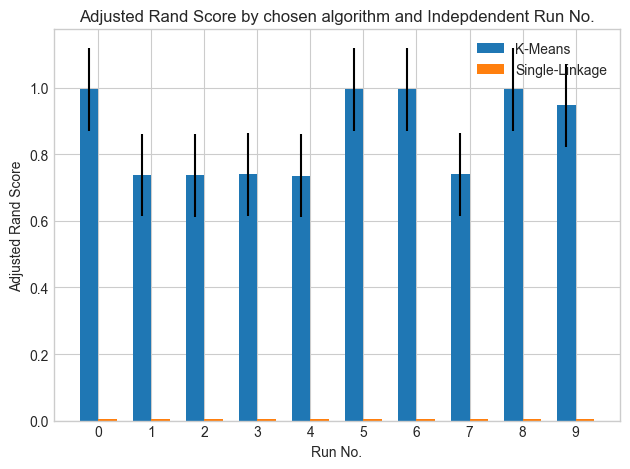

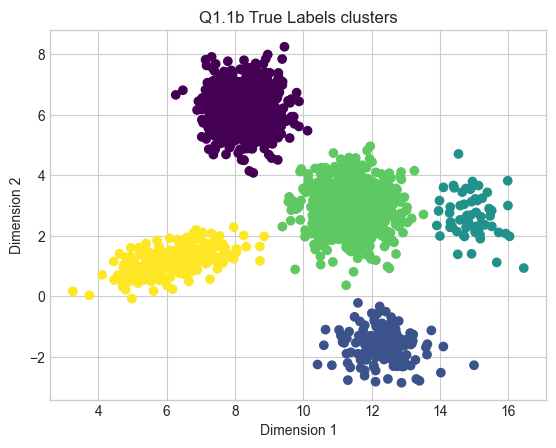

In [63]:
# Loading data and getting the plots
# The black lines are the standard deviation.
q1_1b_data, q1_1b_labels = load_dataset("q1-1b.csv")
q1a_c_barplot(q1_1b_data, q1_1b_labels)
q1a_c_datavis(q1_1b_data, q1_1b_labels, "Q1.1b True Labels clusters")

### Q1.1b Discussion [[1]](#1), [[2]](#2)
#### Question at hand: Using the dataset named `q1-1b.csv`, perform the same experiment as in Q1.1a. Discuss the ARI results obtained, particularly how and why the results are different from Q1.1a.

Starting from the `K-Means` results, we can immediately see that it has performed better than in question `Q1.1a`, with the `ARI` score being higher on average. We also notice that the best achieved performances have reached the values of `ARI` close to 1, which means a perfect score/clustering. Looking at the data and its true labels, we can see that shapes for this case are much more globular and centered (even with some spread for teal and blue); they have also become more similar in size and scale/densities (for example: purple, green, and yellow). Although there is some 'noise' and possible ambiguity due to how close these clusters are, the algorithm manages to overcome these problems due to previously mentioned data behaviour (dense, appropriate shapes). Because of this, most of the algorithms assumptions are met (spherical clusters, roughly the same size), which resulted in overall better performance than previously.

When we look at the `Single-Linkage` results, we can see that the algorithm has consistently scored values close to 0, which means an extremely poor score and extremely missmatched clusters. This is most likely due to the aforementioned `chain effect` due to pairwise agglomeration. Because this algorithm is extremely sensitive to noise/outliers or any ambiguity, it must have created chains where distant points/clusters have become connected due to series of close intermediate points (see yellow->green->teal). As we can see, the clusters here are not as well-separated as those in question `Q1.1a`, which, although not perfect, were much better; which further explains the sudden drop in performance. Also, because the clusters are much more globular, the algorithm lost its advantage of being able to cluster arbitrary shapes.

In summary, the data at hand and its structure suits the `K-Means` algorithm much better than it does the `Single-Linkage` one. It is clear, both from the data shape and `ARI` results, that for `Single-Linkage` the almost-overlapping data points and ambiguity have resulted in long chains across clusters, creating misconfigured shapes and inappropriate results, whereas the `K-Means` algorithm has successfully utilized the clusters shapes and density, resulting in better results than previously, even when faced with somewhat dispersed data.

##### References
<a id="1">[1]</a> Kaufman, L., & Rousseeuw, P. J. (2009). Finding groups in data: an introduction to cluster analysis. John Wiley & Sons.

<a id="2">[2]</a> Alpaydin, E. (2020). Introduction to machine learning. MIT press.

### Q1.1c (2 marks)

Using the dataset named `q1-1c.csv`, perform the same experiment as in Q1.1b. Discuss the results obtained, particularly how and why the results are different from Q1.1b.

**Hints:**
* Visualizing the data itself may help to support your discussion.

### Q1.1c Answer

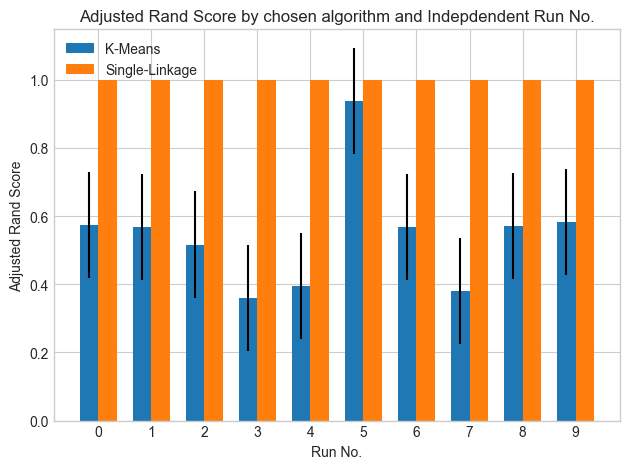

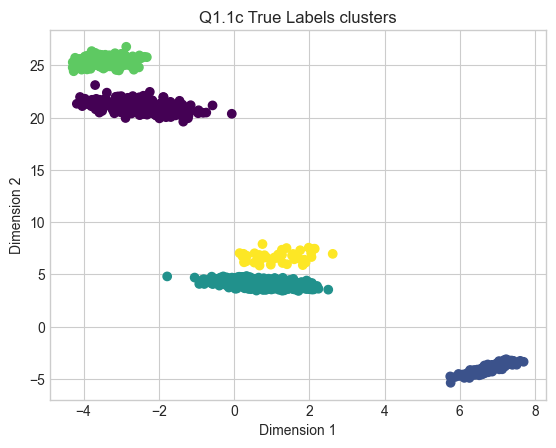

In [64]:
# Please enter any relevant code for Q1.1c below.
# You can use multiple cells if it helps
# Loading data and getting the plots
# The black lines are the standard deviation.
q1_1c_data, q1_1c_labels = load_dataset("q1-1c.csv")
q1a_c_barplot(q1_1c_data, q1_1c_labels)
q1a_c_datavis(q1_1c_data, q1_1c_labels, "Q1.1c True Labels clusters")

### Q1.1c Discussion [[1]](#1), [[2]](#2)
#### Question at hand: Using the dataset named `q1-1c.csv`, perform the same experiment as in Q1.1b. Discuss the results obtained, particularly how and why the results are different from Q1.1b.

Again, starting from the `K-Means` results, we can see that the performance has become more unstable/chaotic when compared to the previous data. Although it can still score highly (even achieving the perfect score), its standard deviation, have increased significantly, which further indicates instability. This means that we will most likely have to run more iterations in order to achieve satisfactory results. When we look at the data shapes on the scatter plot, we clearly see the reason. The algorithms assumption of 'mostly' globular data is not met at all, as all clusters are elongated, which badly influences the algorithm's primary goal to minimize the distance within each cluster in all directions. Moreover, these clusters, although not overlapping, are very close to each other and of different sizes. Because of that, the algorithm might suffer from not being able to accurately place exact boundaries on each of the clusters. All these factors combined result in a behaviour that is likely to get stuck in local minimums and get cluster shapes wrong, as its assumptions are hardly met.

Moving onto the `Single-Linkage` results, we can observe excellent performance on all runs, achieving perfect clustering each time. We can clearly see from the data scatter that this is the perfect environment for this algorithm to thrive in. The clusters are elongated, which is perfect for `Single-Linkage`, as it can cluster arbitrary shapes much better than `K-means`. Moreover, we see that these clusters are mostly stuck together, meaning there is little to no chance of chains forming at the extremes and skewing further merges. Additionally, due to cluster shapes and densities, the closest pairwise merging works perfectly for this data, as the points merged are likely to be picked from the same local (horizontal) axis. Although some of the clusters are close to each other, the data points are far away enough for the algorithm to still connect them appropriately.

In summary, conversely to previous data, this time the `Single-Linkage` algorithm utilizes the data structure much more efficiently and takes advantage of the given shapes. Furthermore, it is clear that the non-globular nature of these clusters have resulted in overall mediocre results for the `K-Means` algorithm. However, it is worth noting that it is still capable of achieving good results, even when its assumptions are not met (due to initialization randomness). This cannot be said about `Single-Linkage`, as seen in previous question, where it struggles with more dispersed data.

##### References
<a id="1">[1]</a> Kaufman, L., & Rousseeuw, P. J. (2009). Finding groups in data: an introduction to cluster analysis. John Wiley & Sons.

<a id="2">[2]</a> Alpaydin, E. (2020). Introduction to machine learning. MIT press.

## Q1.2 (5 marks)

### Q1.2a (3 marks)
Discuss **two** methods that can be used to estimate the *true* number of clusters. A discussion of the suitability and potential issues with each method is expected. No marks are given beyond the first two methods.

### Q1.2a Answer

### Q1.2a Discussion
#### Question at hand: Discuss **two** methods that can be used to estimate the *true* number of clusters. A discussion of the suitability and potential issues with each method is expected. No marks are given beyond the first two methods.

#### Methods chosen: Elbow Method and DBSCAN (Density-Based Spatial Clustering of Applications with Noise). These two were chosen as the author believed they represent two sides of the cluster number estimation methods. Technically, DBSCAN is a clustering method, but as it stands, it automatically finds and assigns clusters, which makes it a valid method for finding the number of clusters.

### Elbow Method [[1]](#1)

#### Explanation:
The Elbow Method, being one of the most popular ways of estimating number of clusters, relies on a heurisitic approach. The method is based on the idea that as the number of clusters increases, the variance within clusters decreases. However, it does does that at a dimnishing rate. As this is happening, the variance is iteratively plotted against the number of clusters set as a range by the user. Then, the user searches for a point where the rate of change shareply decreases, forming a shape resembling an "elbow", hence the name.

It is mostly used for `K-Means` clustering, but can technically be used as a good predictor for any algorithm that aims to partition the data based on the sum of squared distances.

#### Suitability:
1. Simplicity and general ease of application: the method is simple and quite intuitive, especially with the visual aspect. It relies on simple calculations and plotting, with the added visual representation of the optimal cluster number point, which makes it very intuitive to use. As it is also extremely easy to implement, it is a good first quick assessment for later analysis. Its effect is most visible on well-seperated clusters, as for them the "elbow" point is very visible during plotting. It is also more suited for users with less experience, due to its nature.
2. Relatively low computational complexity: less expensive when compared to other, more sophisticated and heavy methods. Mostly applicable to smaller datasets with relatively simple and clear-cut data.
3. General applicability: as the assumptions (both geometric and loss functions) are rather tied to the clustering algorithm the Elbow Method is paired with, this makes the method applicable to a variety of algorithms focused on minimising a given loss function.

#### Potential issues:
1. Subjectivity and ambiguity: the selected "elbow" point can be very much subjective and ambiguous, especially when the cluster variance is gradually decreasing and there is no sharp drop, or when there are multiple elbows. This even holds true when other methods agree on the cluster number.
2. Struggles with high-dimensional data: this method struggles in spaces where the concept of distance becomes less meaningful as the dimensionality increases. The same also holds true when clusters are overlapping or have non-convex shapes.
3. Sensitive and somewhat limited: as the method is based on variance, outliers might distort the variance and produce inaccurate results. Moreover, it is also applicable to algorithms that use Euclidean distance, limiting its generalisation possibilities.
4. Computationally awkward: as the method is iterative, it requires the range to be specified beforehand, which might increase the computational cost exponentially. Moreover, as the size and complexity of the dataset increases, do does the cost, sometimes rendering the method extremely costly to apply successfully.

### DBSCAN [[2]](#2)

#### Explanation:
DBSCAN, as the name suggests, is a density-based algorithm that aims to divide the data into clusters based on its datapoints density. It generally relies on the idea that a cluster is a dense region of closely-placed points in the data space, which is seperated from other regions of lower density. That space is dictated by a distance measurement. It categorizes data into three subgroups: 1) core points; 2) border points; 3) noise points. These subgroups are based on a specified radius (epsilon) and minimum number of points (minPts) needed to form a dense region. These are, of course, hyperparameters chosen by the user which have a signifcant effect on the method's performance. They can be optimized via cross-validation or grid search, but these are out of scope for this answer.


#### Suitability:
1. Noise handling and outlier detection: the method can easily find both outliers and noise, which can guide analysis tied to topics and themes such as anomalies detection and data clearing, especially when the general behaviour is unknown.
2. No required shape or cluster number needed: the method can discover clusters of arbitrary and odd shapes, which further helps navigating through complex data. Moreover, it does not require to have a specified number of clusters (or range) to be set, which makes it better for general problems where not much is known about the data or for exploratory analysis.
3. Robustness: unlike, for example `K-Means`, the method is not dependant on initilization, and therefore does not require several runs once appropriate hyperparameters have been set. Moreover, it is also suited for spatial data clustering, where datapoints may not be evenly distributed across the space, which can provide insightful information even in tough settings. It also tackles non-convex shapes much better when compared to other methods.

#### Potential issues:
1. Sensitive to hyperparameters: as these can greatly influence the end result, setting them requires understanding of data distribution, and may require some trial and error to get them right.
2. Performance degradation: as dimensionality increases, the method might struggle with finding appropriate clusters due to `curse of dimensionality`. This is also the case when clusters have varying densities, as the method might miss the less-dense ones and treat them as noise, or merge them with more dense regions. Similarly for border points, as they might be awkward to capture.
3. Scaling and categorical issues: DBSCAN cannot work with categorical data, and requires scaling when features differ by units or scales (which can introduce bias).

### Summary
Of course, both methods can be successful and provide valuable insight into data when applied appropriately to the data and its specified objectives. The Elbow Method provides a fast and visual representation of the optimal cluster number based on variance, whereas DBSCAN delves deeper into density properties and behaviour datapoints to find the clusters. For simple, well-defined datasets with visible, distinct and seperable clusters, the Elbow Method should do the job just fine enough. However, if we are dealing with complex data with arbitrary and odd shapes, or when the number of clusters is unknown, it is better to apply the more sophisicated DBSCAN (of course after analysing the data beforehand to tune hyperparameters).

##### References
<a id="1">[1]</a> Kodinariya, T. M., & Makwana, P. R. (2013). Review on determining the number of cluster in K-Means clustering. International Journal of Advance Research in Computer Science and Management Studies, 1(6), 90-95.

<a id="2">[2]</a> Ester, M., Kriegel, H.P., Sander, J. and Xu, X., 1996. A density-based algorithm for discovering clusters in large spatial databases with noise. In Kdd, volume 96, pages 226-231.

### Q1.2b (2 marks)

Using the `simple.csv` dataset, apply one of the two methods discussed in Q1.2a to estimate the true number of clusters. Was the estimate correct? Discuss your result.

### Q1.2b Answer

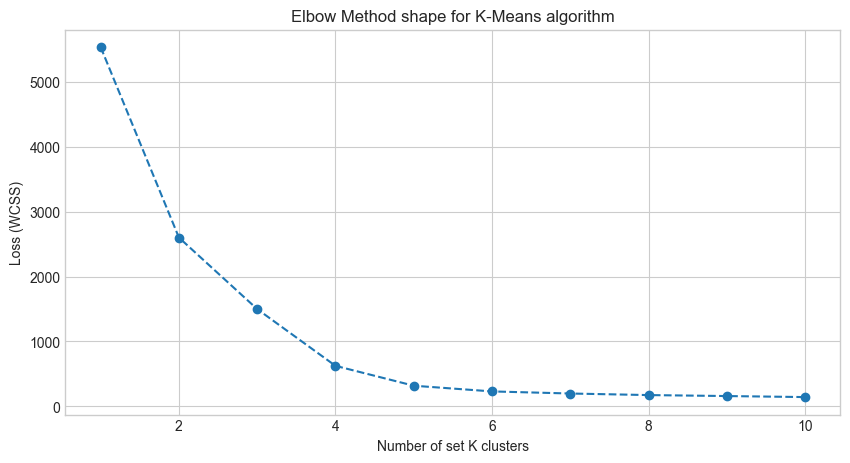

In [65]:
# Please enter any relevant code for Q1.2b below
# You can use multiple cells if it helps

# We will be applying previously used K-Means algorithm to plot the Elbow Method
loss_wcss = []

# Checking for 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="random", n_init=10, max_iter=300, random_state=42)
    kmeans.fit(simple_data)
    loss_wcss.append(kmeans.inertia_)

# Plotting the Elbow Method shape
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), loss_wcss, marker="o", linestyle="--")
plt.title("Elbow Method shape for K-Means algorithm")
plt.xlabel("Number of set K clusters")
plt.ylabel("Loss (WCSS)")
plt.show()

### Q1.2b Discussion
#### Question at hand: Using the `simple.csv` dataset, apply one of the two methods discussed in Q1.2a to estimate the true number of clusters. Was the estimate correct? Discuss your result.

#### Methods chosen: Elbow Method.
The reason this method was chosen is due to its simplicity and relatively small dataset. The initialization method was chosen `k-means++` for efficient starting point centroids estimates and the loss/predictor was chosen as WCSS (within-cluster sum of squares), as it measures the variance within each cluster and minimizing it ensures data points are close within each cluster. As seen previously, in question `Q1.1a`, the nature and shapes of data points seem distinct enough for this method to be applied successfully. As it is not exactly globular, we can also test the Elbow Method's effectiveness when data is slightly out of scope, as it goes against some of `K-Means` assumptions.

#### Was the esimate correct?
Not quite. We can see that the "elbow" point would probably be chosen at `K=4`, instead of the true value `K=5`, due to the sharpness of change at that point. However, it is somewhat hard to see, and one could very much argue that the final (somewhat) visible drop occurs after the fifth iteration.

#### Discussion:
Although not quite there, the method was close enough to the actual answer, which suggests that it captured most of the underlying structure, missing actual answer by one cluster. As the method is heuristic, it is usually not definitive and should be used with caution, as it gives an estimate at which point adding more clusters does not improve variance. As seen here, sometimes this point might not be sharp enough for exact visual capture, which leads to ambiguity. 

Moreover, even when there are only a few clusters, the method might struggle to identify the exact count when they are not distinct-enough from one another; this is further noticable when clusters have different shapes and densities, especially when not globular or less dense. This is most likely the case here, as three of the clusters are globular (purple, blue, green), while the rest are elongated (teal, yellow). Furthermore, we can see that the teal cluster is the smallest, which might indicate that it was the one missed by the method, as it would represent the smallest amount of variance.

Of course, even though the Elbow Method is an extremely common technique, we can see that it does not always work. That is why it is advised to use more than one method, and analytically scrutinize each based on data's nature and given objectives. For example, further checks via silhouette analysis or gap statistics could provide additional insight.

In conclusion, the method managed to provide an ok estimate of number of clusters, but ultimately missed the mark. This highlighted not only the importance of sanity checking methods and data within given context, but also validation through additional methods. In that spirit we noticed that clusters somewhat outside given algorithms assumptions (in this context, `K-Means` assumptions stated previously) can be very easily missed, and sometimes have little to no effect on the Elbow Method point estimation, meaning we need to be extra careful and thorough with our analysis.

## Q1.3 (5 marks)

For this question, we will use the `online_retail_full.csv` dataset, which is a real-world dataset of transactions for an online retail store. Full information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II). Here, we do not have true labels, and need to explore the data instead. This is a common scenario in practice, and will require you explore the data and use clustering (likely requiring multiple iterations and tweaks) to try to find patterns. 

We're going to investigate whether there are groups of customers, how they are similar, and what they may represent. For simplicity, we will start by using KMeans as our model, and we'll remove some of the columns from our input data. Use a range of $K$ values and whichever techniques in Q1.2 are useful to propose interesting $K$ value(s). Comment on the clusters that are produced in terms of the context of the data.

Hints:
* As this dataset has no truth, there is a lot of scope in this question - remember to have some justification for why you have taken the steps you have.
* The quality of your final clusters is not important for marks, as long as you have taken reasonable steps.
* The overall aim is to try to find patterns in the data. KMeans is suggested as a starting point, but it is not always the best algorithm to use as we have seen in previous questions. 
* You can create features from the existing ones. For example, the quantity and price can be multiplied to get a total amount (thus simplifying the data). Other features may require transformation before they can be used.

## Q1.3 Answer

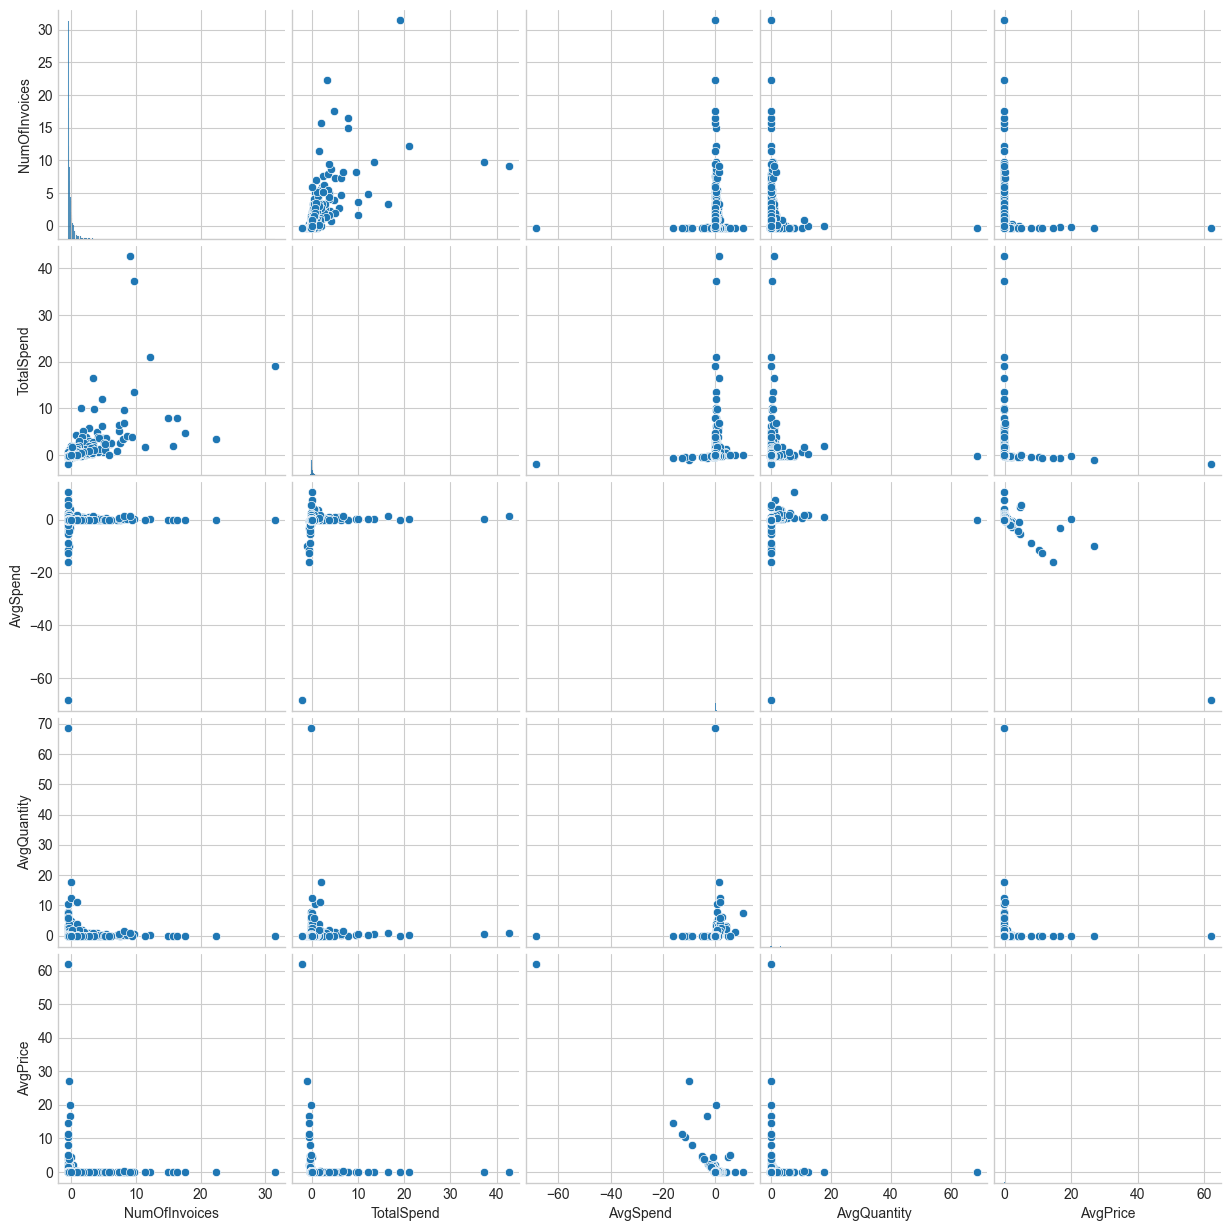

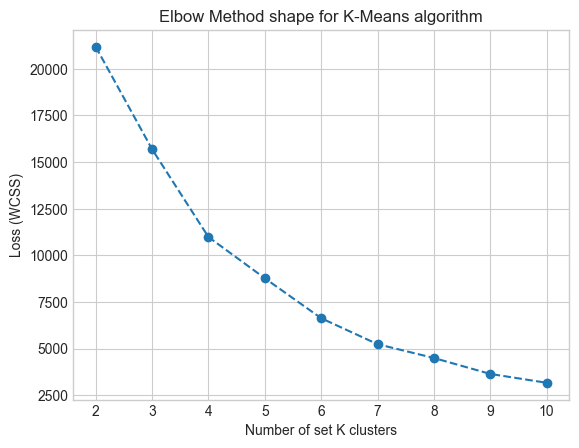

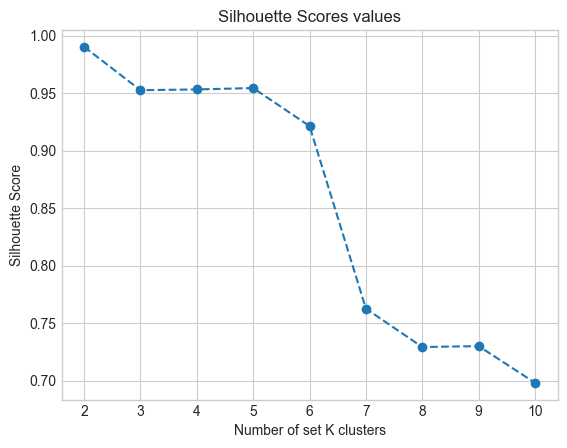

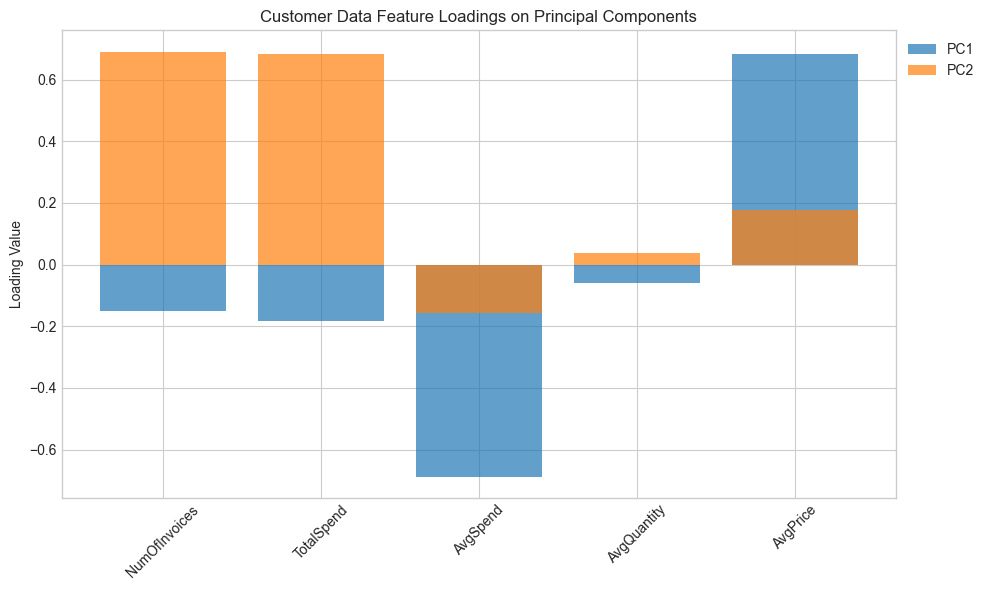

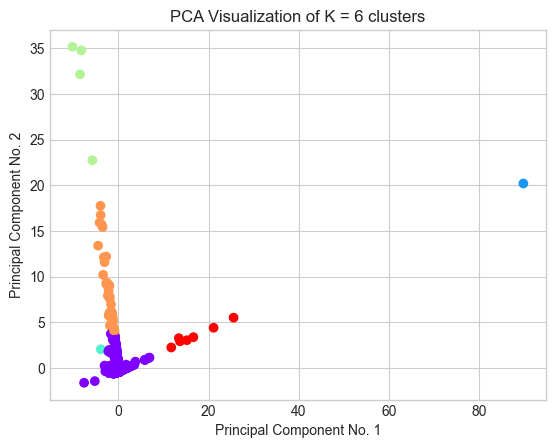

In [66]:
# Load the data (the path may be different for you, adjust if needed)
retail = pd.read_csv("online_retail_full.csv", index_col=False)

# Import libraries used for analysis/processing
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.cluster import DBSCAN

# Investigate initial data (can also be checked through bash `head $filename`)
# print(retail.head())

# Initial data processing
retail.dropna(subset=["Customer ID"], inplace=True)
retail["TotalAmountPaid"] = retail["Quantity"] * retail["Price"]

# Deriving metrics for each customer and set the columns
customer_data = retail.groupby("Customer ID").agg({
    "Invoice": "nunique",
    "TotalAmountPaid": ["sum", "mean"],
    "Quantity": "mean",
    "Price": "mean"
}).reset_index()

customer_data.columns = ["CustomerID", "NumOfInvoices", "TotalSpend", "AvgSpend", "AvgQuantity", "AvgPrice"]

# Scale the data due to different scales/units
s_scaler = StandardScaler()
# We drop "CustomerID" as it is no longer needed and does not represent quantiative data
scaled_customer_data= s_scaler.fit_transform(customer_data.drop("CustomerID", axis=1))

# Use PCA to acquire only appropriate data, generate only 2 components based on features
pca = PCA(n_components=2)
pca_customer_data = pca.fit_transform(scaled_customer_data)

# K-Means initalization of relevant variables
loss_wcss = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=300, random_state=42).fit(scaled_customer_data)
    loss_wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_customer_data, kmeans.labels_))

# Plot the data scatter, for (hopefully), initial visualisation and better grasp
sns.pairplot(pd.DataFrame(scaled_customer_data, columns=["NumOfInvoices", "TotalSpend", "AvgSpend", "AvgQuantity", "AvgPrice"]))
plt.show()

# Plot results of the Elbow Method
plt.figure()
plt.plot(cluster_range, loss_wcss, marker="o", linestyle="--")
plt.title("Elbow Method shape for K-Means algorithm")
plt.xticks(cluster_range)
plt.xlabel("Number of set K clusters")
plt.ylabel("Loss (WCSS)")
plt.show()

# Plot Silhouette scores as an additional method for cluster finding
plt.figure()
plt.plot(cluster_range, silhouette_scores, marker="o", linestyle="--")
plt.title("Silhouette Scores values")
plt.xticks(cluster_range)
plt.xlabel("Number of set K clusters")
plt.ylabel("Silhouette Score")
plt.show()

# As these graphs have not shown optimal cluster point due to high dimensionality and complexity,
# we will try applying the DBSCAN for further help
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# dbscan_labels = dbscan.fit_predict(scaled_customer_data)
# dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
# print(dbscan_clusters)
# Ultimately, the method was dropped due to difficult hyperparameter optimization

# Based on above graphs, the optimal cluster number was found to be around ~6
# as the number achieved both high Silhouette Score and OK Elbow Method point
optimal_cluster_number = 6
kmeans_result = KMeans(n_clusters=optimal_cluster_number, init="k-means++", n_init=10, max_iter=300, random_state=42).fit(scaled_customer_data)

# Now, we visualise the resultant clusters using PCA
# Create a df for easier and better visualization
pca_loadings = pd.DataFrame(pca.components_, columns=customer_data.columns[1:], index=["PC1", "PC2"])

# Check the contributions of each feature for each PC compoment
"""
print(loadings_df)
     NumOfInvoices  TotalSpend  AvgSpend  AvgQuantity  AvgPrice
PC1      -0.150719   -0.182057 -0.688688    -0.058338  0.682968
PC2       0.690266    0.682367 -0.158342     0.035866  0.177622
"""

# Plotting for PC1 and PC2 loadings, for better visualization
plt.figure(figsize=(10,6))
plt.bar(pca_loadings.columns, pca_loadings.loc["PC1"], label="PC1", alpha=0.7)
plt.bar(pca_loadings.columns, pca_loadings.loc["PC2"], label="PC2", alpha=0.7)
plt.title("Customer Data Feature Loadings on Principal Components")
plt.ylabel("Loading Value")
plt.xticks(rotation=45)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()

# Plotting the K derived clusters based on PCA
plt.figure()
plt.scatter(pca_customer_data[:, 0], pca_customer_data[:, 1], c=kmeans_result.labels_, cmap="rainbow")
plt.title(f"PCA Visualization of K = {optimal_cluster_number} clusters")
plt.xlabel("Principal Component No. 1")
plt.ylabel("Principal Component No. 2")
plt.show()

### Q1.3 Discussion [[1]](#1), [[2]](#2), [[3]](#3)

#### Data Preprocessing and Exploration:
Before we analyse any data, it is always important to clean, adjust, and remove whatever data might affect our analysis. In this context, as we are interested in gathering information via clustering of customers, we first need to make sure we do not have any missing values. This was done via dropping any empty/NaN values in the dataset. 

Then, as suggested, we have created a new feature called `TotalAmountPaid` through combining the `Quantity` and `Price` features. This gives us a unified measure of actual "value" per each transaction, which provides more information than each of these features alone.

The data was also investigated through checking the units, values of interesting features. It was assumed that the necessary data was complete, and that outliers or extreme values were still true data, and therefore were left as they were. It was also decided at this time that we would mostly focus on the quantiative aspect of the data, rather than qualitative, as it was easier to accomplish.

Moreover, the provided link to data was investigated and the following information was obtained:

"This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers." [[4]](#4)

This information might guide our investigation later, especially when clusters have been created.


#### Preparation for clustering:
It was decided that the data should be grouped based on the following features: `["NumOfInvoices", "TotalSpend", "AvgSpend", "AvgQuantity", "AvgPrice"]` for each of the unique customer IDs. Each of the following features was decided as follows:
1. `NumOfInvoices` - this feature gives us information about how many unique invoices were placed by each customer, which helps illustrate the frequency of their purchases; frequent shopper will most likely represent different patterns than casual ones
2. `TotalSpend` - this feature represent the total amount a customer has spent on their purchases - this helps find high-value customers willing to buy either expensive items or in bulk
3. `AvgSpend` - this feature represent the average amount a customer spends, which helps us differentiate between `TotalSpend` customers, because two customers might have the same `TotalSpend`, but share different buying habits (frequent/in bulk but cheap vs. infrequent/occasional but expensive)
4. `AvgQuantity` - this feature tells us about the average quantity a customer usually buys, further helps differentiate between customers (bulk - wholesalers vs. occasional - individual customers)
5. `AvgPrice` - this feature represent the average price of items a customer purchases, helps in differentiating between luxury shopper vs. casual shoppers

While this list of features is not exhaustive by any means, they were deemed sufficient for the analysis at hand, as they would represent most of customer behaviours we might be looking for, while excluding other unnecessary (in this context) features, such as `Description` or `InvoiceDate`. Of course, it is worth noting that these features are not useless, they are just not needed here. These features could be used when exploring other themes, such as `Recency vs. Time of Purchase` or `Products Variety vs. Time of the Year`. 

After these features were selected, they needed to be scaled accordingly in order to produce a trustworthy and accurate analysis. This was done because many of these features possess different units and scales. Without scaling, we would face several issues when trying to analyse the data visualy or analytically. This also helps achieve consistency across features.

Due to the high dimensionality of data, it was decided that usage of Principal Component Analysis (PCA) would make the resultant clusters more readable and easier to understand. Of course, this is done through reducing dimensionality to a given number of components (here we used `n_components=2`), where resultant components can be thought of as a weighed-importance of given features against each other.

#### K-Clusters analysis and Clustering
It was decided that the Elbow Method can be used, but it should be supported via another method. The Silhouette Score was chosen as the supplementary method, as it was also simple to apply and it was believed that these two methods combined would result in an appropriate `K` approximation. Additionally, the features were plotted against each other using `sns.pairplot`, but the resultant graphs proved to be hard to read, and were therefore not used much later on.

The possible cluster values were iterated 2 through 11, and results were plotted on respective Elbow Method and Silhouette Score plots. When the results of these two methods were combined, an optimal value of `K=6` was chosen. It was based on the fact that for this value, the Elbow Method's plot seemed to have stagnated, and the Silhouette Score's value for this `K` was still sufficiently high enough. This analysis was done on the `scaled_customer_data` rather than `pca_customer_data`, as it was important to retain as much information as possible, especially that the dataset dimensionality was not exceptionally high and we wanted to keep customer behaviour details. We will use PCA only for visualisation purposes later on.

Then, using the acquired value, the clusters were obtained throug the `K-Means` algorithm. Then, we plotted these clusters using PCA representations for better visualisation alongside the feature loadings for each of the PCA components. These combined will help us better describe the produced clusters and which types of customers they might represent.

#### Cluster discussion:
Based on the loading barplot for each of the PC components, we can deduct the following:
1. As `"NumOfInvoices"` and `"TotalSpend"` increase, the resultant `PC2` component also increases.
2. As `"AvgPrice"` increases, the resultant `PC1` increases, and `PC2` component increases slightly.
3. As `"NumOfInvoices"` and `"TotalSpend"` decrease, the resultant `PC1` component decreases slightly.
4. As `"AvgSpend"` decreases, the resultant `PC1` component decreases, and `PC2` component decreases slightly.
5. `"AvgQuantity"` seems to have little to no effect on any component, and can therefore be ignored.

Given these observations and the clusters scatter plot, we can see the following:


1. `Green Cluster` - low `PC1` and high `PC2`, customers in this cluster seem to buy items at lower `AvgPrice`, but have a high `NumOfInvoices` and `TotalSpend`, which indicates that while they shop frequently, they buy a lot of items for low price on average. This indicates most likely wholesalers who focus on smaller, less expensive gifts for more frequent/general occasions, such as relationship anniversaries or parties. This group would most likely utilize bulk purchase deals/discounts and value packs.

2. `Orange Cluster` - low `PC1` and medium `PC2`, customers in this cluster seem to buy items at lower `AvgPrice`, but have a medium `NumOfInvoices` and `TotalSpend`, which indicates they do not shop as frequently as the Green Cluster, but still buy quite a few items for low price on average. This indicates most likely wholesalers who focus on occasional gifts for occasions such as Easter or Christmas, or value shoppers who prefer to wait for discounts. These customers would most likely take advantage of periodic discount sales or bundle deals.

3. `Purple Cluster` - low `PC1` and low `PC2`, customers in this cluster seem to buy items at lower `AvgPrice`, and have a low `NumOfInvoices` and `TotalSpend`, which indicates they do not shop frequently, and even when they do, they tend to go for the more affordable options. This most likely represents individual customers and not wholesalers, who either only buy when they see a good deal or who shop primarily elsewhere and only occasionally buy from this retailer. In order to encourage this group, the retailer should focus on special promotions or loyalty programmes to induce more frequent shopping.

4. `Red Cluster` - relatively higher `PC1` and low-to-medium `PC2`, customers in this cluster seem to buy items at higher `AvgPrice` than previous clusters, with higher `TotalSpend` while keeping the `NumOfInvoices` relatively low. This most likely represents individual occasional "premium" customers, they do not shop frequently, but often opt for more expensive items; might choose quality over quantity, might be associated with very special occasions, such as wedding anniversaries. For this group, curated selections of items or exclusive offers on premium items might entice them to buy and increase their visit frequency.

5. `Blue Cluster` - high `PC1` and relatively high `PC2`, customers in this cluster seem to buy items at high `AvgPrice`, and have a high `NumOfInvoices` and `TotalSpend`, which indicates they both shop frequently and opt for expensive items in large quantities. This most likely represents wholesale "premium" customers. They are similar to the `Red Cluster` in the fact that they might be associated with very special occasions, but do it in bulk and on a large scale. These customers, although sparse, should be given exclusive access to products and personalized shoppoing experience, as they provide a lot of value to the retailer.

The last cluster (turqoise), is ignored as it can be deemed as noise, especially being this close to other clusters.

#### Summary 
In summary, each of these clusters presents a distinct customer behaviour. If the retailer chooses to tailor his offer to each, or some, of these groups, they boost both profit margins and customer loyalty. Moreover, these findings can be coupled with other features (such as `InvoiceDate`) to generate even more insights which can further and better guide strategies such as when to start, for example, Christmas Sale and who it should be tailored to.

##### References
<a id="1">[1]</a> Sci-Kit Learn Silhouette Score https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

<a id="2">[2]</a> Sci-Kit Learn Standard Scaler https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

<a id="3">[3]</a> Sci-Kit Learn PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

<a id="4">[4]</a> Chen,Daqing. (2019). Online Retail II. UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/502/online+retail+ii


# Question 2: Itemset Rule Mining (4 marks) 

For this question, we will be using a [real-world dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) which gives the votes of 435 U.S. congressmen on 16 key issues gathered in the mid-1980s, and also includes their party affiliation as a binary attribute. This is a purely nominal dataset with some missing values (corresponding to abstentions). It is normally treated as a classification problem, the task being to predict party affiliation based on voting patterns. However, association-rule mining can also be applied to this data to seek interesting associations.

We will be using [Weka](https://www.cs.waikato.ac.nz/ml/weka/), both for its utility for itemset rule mining, and to use a different approach for exploring data. You should have some experience using Weka from the first (non-assessed) week.

You may need to take screenshots of Weka and include them in your answer below, or copy & paste the relevant rules. Please ensure that your answer and rules are clearly legible.

## Q2.1 (3 marks)

In Weka, run `Apriori` on this dataset using default settings. Comment on any patterns you see in the rules that are generated. Also discuss their support, confidence, and lift, demonstrating that you understand how they are calculated, their role, and how to interpret these values.

### Q2.1 Answer [[1]](#1)
#### Definitions of support, confidence, and lift:
We will first set the definitions of these phenomena to be used in later discussion. We set how they are calculated, their role, and how to correctly interpret these values.

1. `Support (s)`: can be described as the proportion of transactions in the dataset that contain the antecedent (left side) of the rule; it can be calculated using the following formula: 
$$
Support(A \rightarrow B) = \frac{\text{Number of transactions containing both } A \text{ and } B}{\text{Total number of transactions}}
$$
Support provides an indication of how frequently a given itemset appears in the dataset. A high support means that a given rule is applicable to larger portion of all transactions, making it more useful. If the support is low, it means the rule might not be as generally useful.


2. `Confidence (c)`: can be described as the probability of seeing the consequent (right side) of the rule given the presence of antecedent; it can be calculated using the following formula:
$$
Confidence(A \rightarrow B) = \frac{\text{Number of transactions containing both } A \text{ and } B}{\text{Number of transactions containing } A}
$$
Confidence gives us a representation of how reliable/trustworthy a given rule is. A high confidence means that the consequent is very likely given the antecedent, making the rule more dependable. If the confidence is low this means a given rule is not as reliable.


3. `Lift (L)`: can be described as the ratio of support of a given rule against the same rule if the antecedent and consequent were independent; it can be calculated using the following formula:
$$
Lift(A \rightarrow B) = \frac{\text{Support}(A \rightarrow B)}{\text{Support}(A) \times \text{Support}(B)}
$$
Lift represents the strenght of a rule in terms of how likely, for example, items are bought together vs. being bought individually. A lift greater than 1 means that both antecedent and consequent are more likely to be bought together than by random chance. A lift value smaller than 1 indicates that items are less likely to be bought together. Lift value of 1 indicates no correlation.


#### Discussion about the patterns in rules:
From the following 10 best rules generated, several rules appearing frequently between all rules, most prominent examples are:
1. `physician-fee-freeze=n`: appears in at least 7 rules
2. `aid-to-nicaraguan-contras=y`: appears in at least 7 rules
3. `el-salvador-aid=n`, `adoption-of-the-budget-resolution=y`: appear in as least 3 rules

This means that these issues were central points during this period, and had significant influence on resultant party alignment; especially for Democrats.

We see that all of present rules have extremely high confidence and lift, meaning all of these reliable and indicate consequential results, meaning if `A` then very likely `B`. 

An interesting rule is the 5th rule, where we see that `physician-fee-freeze=n 247 -> class=democrat 245`, with support ~0.56, confidence ~0.99 and lift ~1.62. This means that if someone has vosted `physician-fee-freeze=n`, we can almost immediately tell that he is a democrat, as only 2 of total votes cast this way were not from the Democratic class.

Moreover, we see that although the sequence of given rules changes a bit, the general trends stay the same. Meaning, we can get rule `D` strictly from analysing rules `A`,`B`, and `C`. This can be seen in rules 3, 6, 9, and 10. This indicates that these rules share extremely similiar behaviour between each other, and that most of them are a result of generalized dependence between all votes, which most likely showcases the Democrat party voting patterns and solidarity.

Some of these rules have the `democrat` instance in the middle of the rule, whereas others (similarly structured), end in the `democrat` class. An example being rules 6 and 9, where they can be used and applied interchangably. They also result in the same conclusions, meaning if `(A and B) -> C` then `(A and C) -> B` This further solidifies the apparent popularity and strenght of these rules based on singular key issues.

We also see that 9 of the 10 presented rules have the `class=democrat` somewhere in their structure, which points to strong trends within the democratic party, possibly dominating the dataset with their voting patterns/frequency. It might also mean that the Democratic party are more consistent with their votes, whereas the Republicans tend to be more divided on issues.


##### References
<a id="1">[1]</a> Association Rule Mining @Wikipedia: https://en.wikipedia.org/wiki/Association_rule_learning

![Screenshot 2023-10-24 at 01.47.43.png](<attachment:Screenshot 2023-10-24 at 01.47.43.png>)
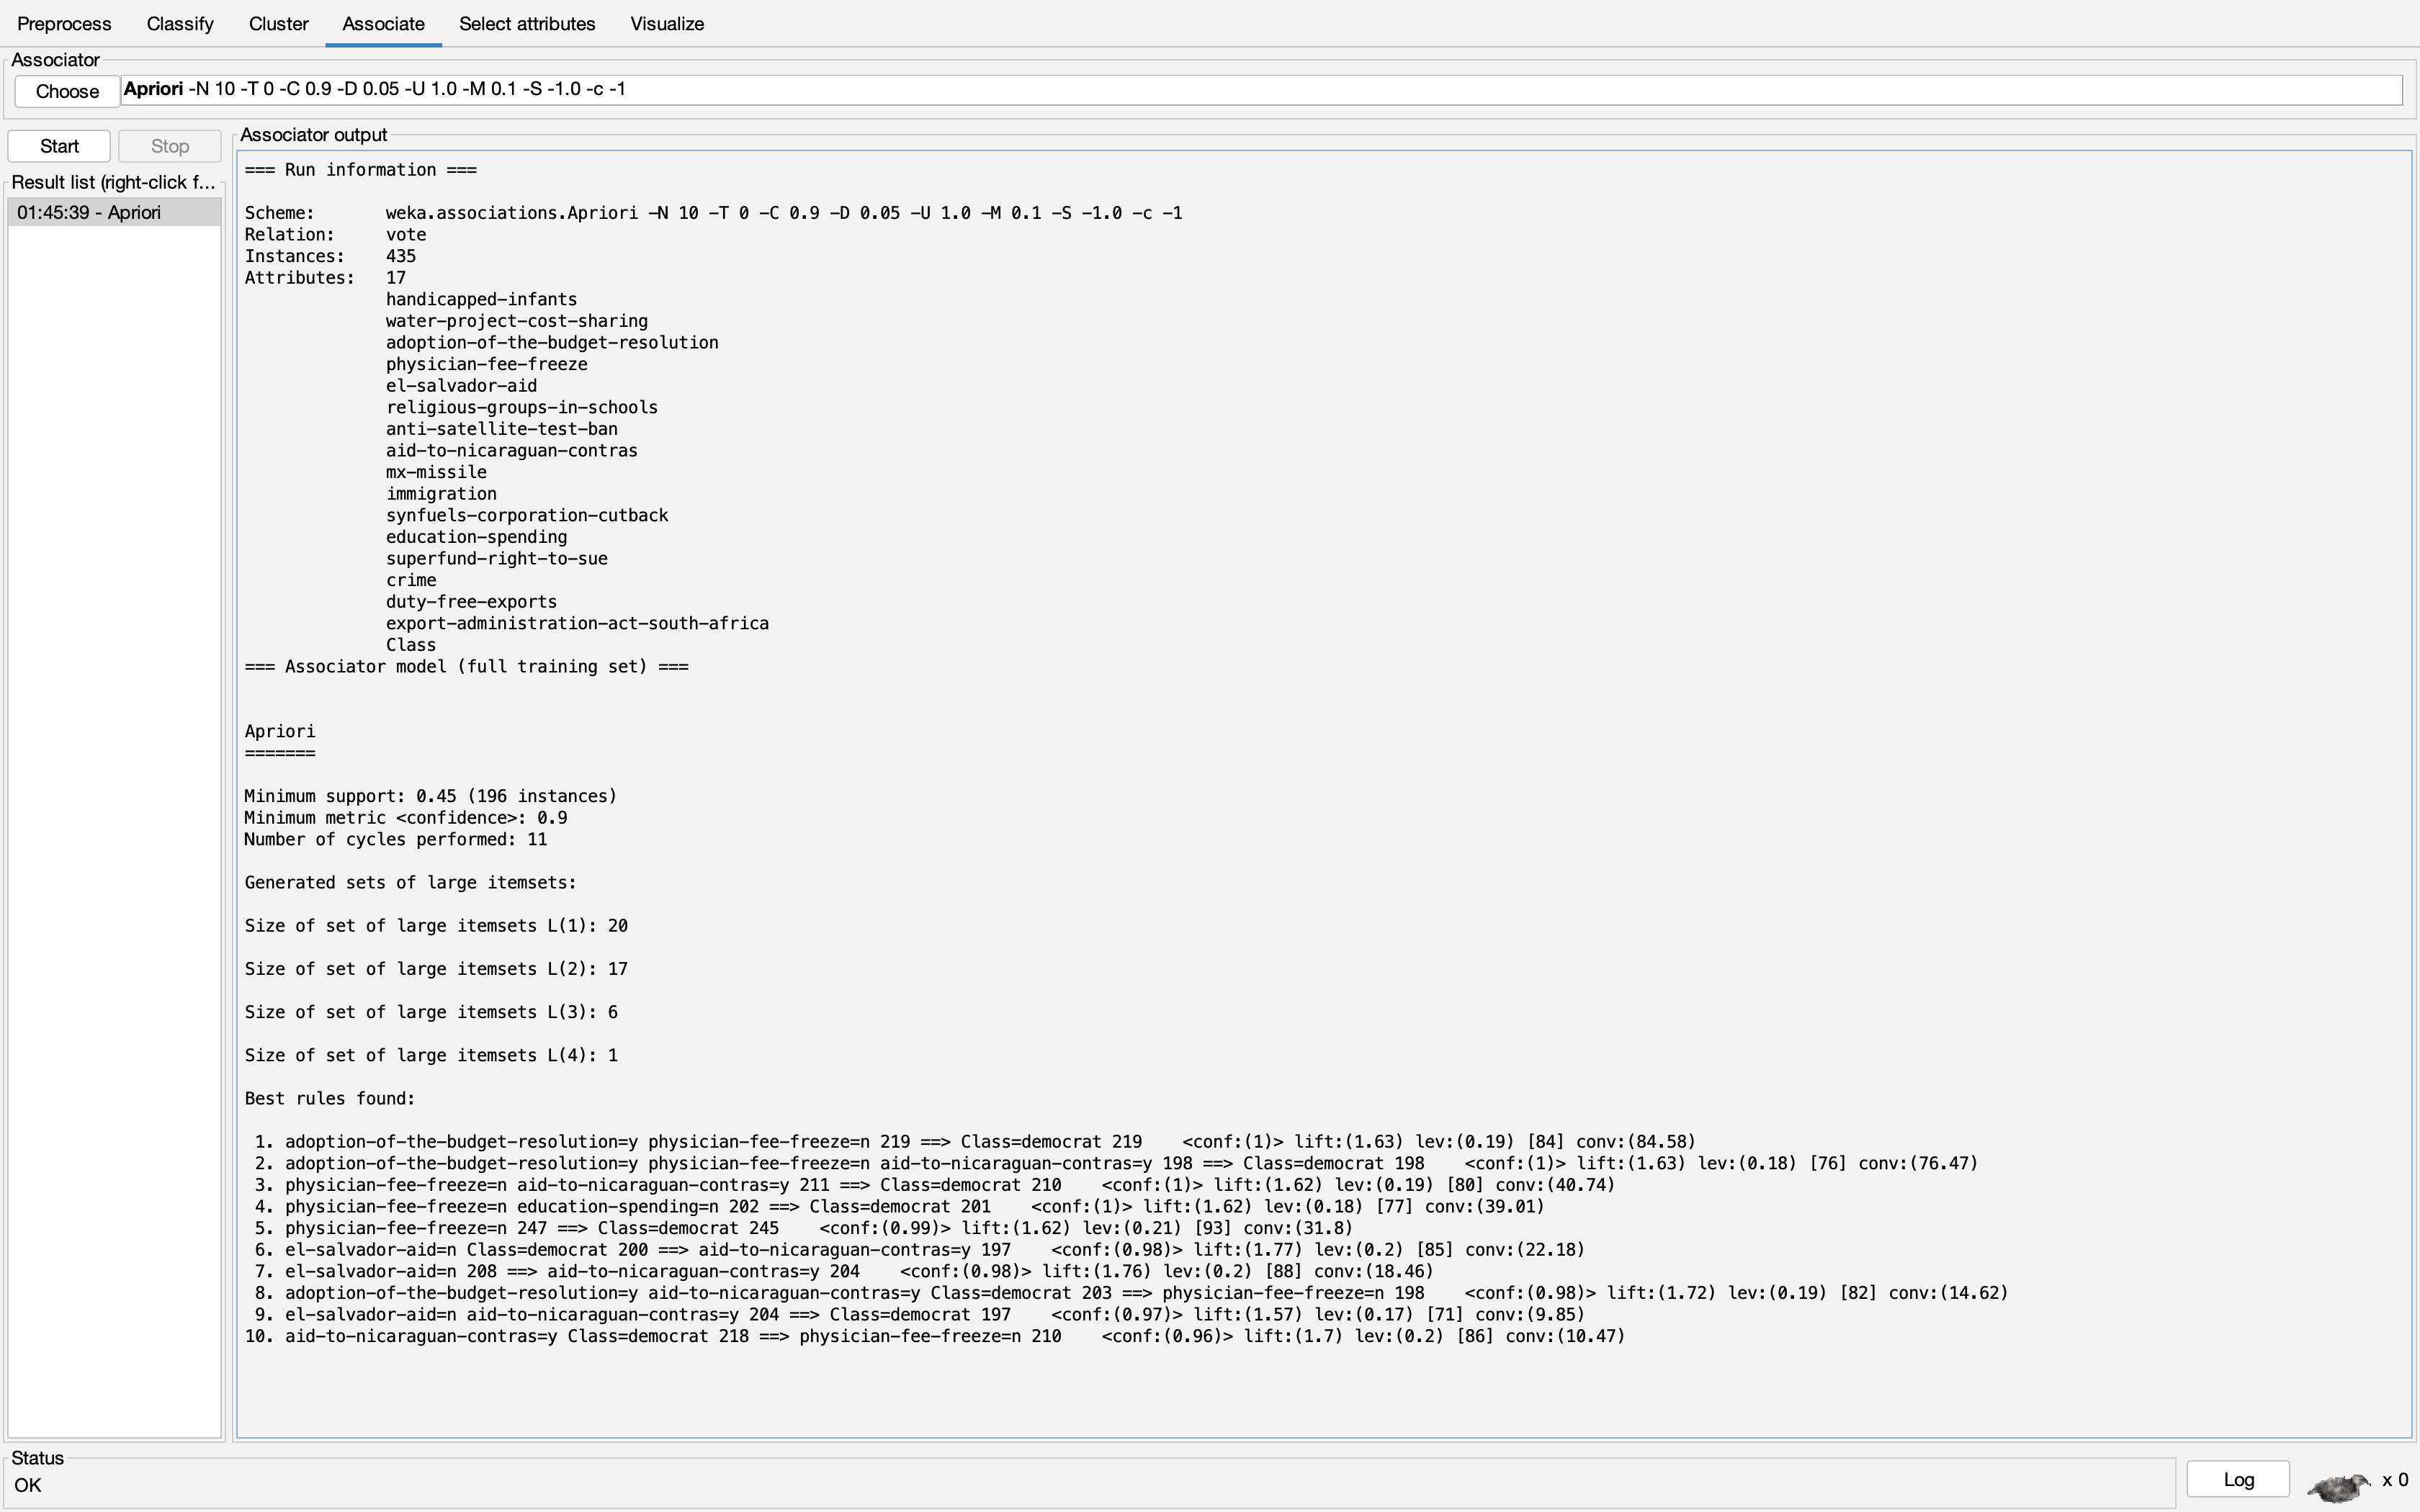

## Q2.2 (1 mark)

It is interesting to see that none of the rules in the default output involve `class = republican`. Why do you think that is?

## Q2.2 Answer

#### Discussion:

The answer might be based on several factors, we will list the two most important ones:

1. Support and confidence thresholds/data imbalance: as seen in the screenshot, a rule must meet at least support of 0.45 and confidence of 0.9. If we have visibly more democrats then republicans (for example, 245 Democrats vs. 190 Republicans), then we will nevber meet the support criteria and will therefore never output a rule for the republican class. It is very possible that these set criteria simply favored patterns associated with Democrats, which resulted in clear imbalance. This could be tackled by lowering the thresholds, or by applying other criteria which would help offset this issue.

2. The inherent voting records results: it might just be that Democrats have stronger and more consitent voting patterns, which simply overtake generated trends. These patterns might be due to clearer and more concise party vision, or much more unified views. These might be due to historical or political context of this period.

Of course, to exactly determine the reason, one would need to dig a bit deeper and conduct a proper analysis, which would include problems such as dataset's distribution, parameters set for the `Apriori` algorithm, or the historical context of data. However, as it stands, these two proposed reaons most likely answer the question at hand.